#### 가정) 오후 미세먼지에 영향받는 실질적인 유동인구 연령을 구할 수 있을 것이다

In [1]:
import seaborn as sns    
%matplotlib inline  
from matplotlib import font_manager, rc
import pandas as pd

In [2]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
#데이터 불러옴
flow_data = pd.read_pickle('../../data/local_data/pkls/fppkl/real_move.pickle')
dust_data = pd.read_pickle('../../data/local_data/pkls/dustpkl/gutotal_365_PM.pickle')

In [5]:
# flot_data.columns=['STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM', 'FLOW_POP_CON_00',
#        'FLOW_POP_CON_10', 'FLOW_POP_CON_20', 'FLOW_POP_CON_30',
#        'FLOW_POP_CON_40', 'FLOW_POP_CON_50', 'FLOW_POP_CON_60',
#        'FLOW_POP_CON_70', 'SUM', 'MEAN', 'SUM-WORKER']
del flow_data['STD_YM']
del flow_data['HDONG_CD']
# del flow_data['STD_YMD']
# del flow_data['HDONG_NM']
flow_data.columns

Index(['STD_YMD', 'HDONG_NM', 'FLOW_POP_CON_00', 'FLOW_POP_CON_10',
       'FLOW_POP_CON_20', 'FLOW_POP_CON_30', 'FLOW_POP_CON_40',
       'FLOW_POP_CON_50', 'FLOW_POP_CON_60', 'FLOW_POP_CON_70', 'SUM', 'MEAN',
       'SUM-WORKER'],
      dtype='object')

In [6]:
dust_data.dtypes
# dust_data['date'] = dust_data['date'].astype('float64')
dust_data.date=pd.to_datetime(dust_data.date,format='%Y%m%d')
#날짜별로 동 다 합쳐버리자

In [7]:
dust_data.date

1       2018-04-02
2       2018-04-03
3       2018-04-04
4       2018-04-05
5       2018-04-06
6       2018-04-07
7       2018-04-08
8       2018-04-09
9       2018-04-10
10      2018-04-11
11      2018-04-12
12      2018-04-13
13      2018-04-14
14      2018-04-15
15      2018-04-16
16      2018-04-17
17      2018-04-18
18      2018-04-19
19      2018-04-20
20      2018-04-21
21      2018-04-22
22      2018-04-23
23      2018-04-24
24      2018-04-25
25      2018-04-26
26      2018-04-27
27      2018-04-28
28      2018-04-29
29      2018-04-30
30      2018-05-01
           ...    
10189   2019-03-01
10190   2019-03-02
10191   2019-03-03
10192   2019-03-04
10193   2019-03-05
10194   2019-03-06
10195   2019-03-07
10196   2019-03-08
10197   2019-03-09
10198   2019-03-10
10199   2019-03-11
10200   2019-03-12
10201   2019-03-13
10202   2019-03-14
10203   2019-03-15
10204   2019-03-16
10205   2019-03-17
10206   2019-03-18
10207   2019-03-19
10208   2019-03-20
10209   2019-03-21
10210   2019

In [8]:
flow_data.STD_YMD=pd.to_datetime(flow_data.STD_YMD,format='%Y%m%d')

In [9]:
# flow_data['STD_YMD'] = pd.to_datetime(flow_data['STD_YMD'], format='%Y%m%d', errors='ignore')

In [10]:
dust_data.columns=['HDONG_NM', 'date', 'pm10', 'pm10_class','msg', 'msg_yes','pm25_class5']
# del dust_data ['HDONG_NM']
# del dust_data['date']

In [11]:
mean_flow_data=flow_data.groupby(['STD_YMD']).mean()
#del flow_data['HDONG_CD']
mean_flow_data

,FLOW_POP_CON_00,FLOW_POP_CON_10,FLOW_POP_CON_20,FLOW_POP_CON_30,FLOW_POP_CON_40,FLOW_POP_CON_50,FLOW_POP_CON_60,FLOW_POP_CON_70,SUM,MEAN,SUM-WORKER
STD_YMD,,,,,,,,,,,
2018-04-01,392.612500,4951.304444,12128.261111,13629.992778,15144.990000,15473.123333,11149.277500,4621.792222,77491.353889,4843.209618,77491.353889
2018-04-02,202.250556,5118.468056,16843.069444,19352.061111,22155.390000,20470.976111,14171.582222,6177.334167,104491.131667,6530.695729,93638.672937
2018-04-03,194.233889,5282.998056,17093.723611,20125.809722,23206.536111,21406.519167,14866.327500,6291.169167,108467.317222,6779.207326,97614.858493
2018-04-04,215.112500,5570.279722,17102.179722,20280.486667,23049.118333,21078.545000,14450.025278,6019.618611,107765.365833,6735.335365,96912.907104
2018-04-05,192.871111,5237.302222,16496.902778,19696.313889,22505.716389,20309.937222,13746.743333,5501.734444,103687.521389,6480.470087,92835.062659
2018-04-06,231.876667,5651.045278,16343.969444,19627.870556,22194.683611,20300.125833,13942.432778,5866.304722,104158.308889,6509.894306,93305.850159
2018-04-07,470.507500,5540.907778,15403.416667,17989.555000,19604.605278,19334.734722,13687.804444,5583.221111,97614.752500,6100.922031,97614.752500
2018-04-08,388.886667,4477.963611,11510.528611,13157.536944,14632.780000,15027.436944,10939.034722,4528.313333,74662.480833,4666.405052,74662.480833
2018-04-09,196.509444,4996.715278,16521.024444,19292.751111,21982.454444,20277.721944,14110.835000,6093.795833,103471.807500,6466.987969,92619.348771


In [12]:
mean_dust_data=dust_data.groupby(['date']).mean()
mean_dust_data.reset_index(inplace=True)

In [13]:
mean_dust_data.dtypes

date           datetime64[ns]
pm10                  float64
pm25_class5           float64
dtype: object

In [14]:
flow_dust=pd.merge(mean_dust_data, mean_flow_data,left_on=(['date']),right_on=(['STD_YMD']))

In [15]:
flow_dust

,date,pm10,pm25_class5,FLOW_POP_CON_00,FLOW_POP_CON_10,FLOW_POP_CON_20,FLOW_POP_CON_30,FLOW_POP_CON_40,FLOW_POP_CON_50,FLOW_POP_CON_60,FLOW_POP_CON_70,SUM,MEAN,SUM-WORKER
0,2018-04-01,80.257692,1.923077,392.612500,4951.304444,12128.261111,13629.992778,15144.990000,15473.123333,11149.277500,4621.792222,77491.353889,4843.209618,77491.353889
1,2018-04-02,84.346429,2.000000,202.250556,5118.468056,16843.069444,19352.061111,22155.390000,20470.976111,14171.582222,6177.334167,104491.131667,6530.695729,93638.672937
2,2018-04-03,89.760714,2.142857,194.233889,5282.998056,17093.723611,20125.809722,23206.536111,21406.519167,14866.327500,6291.169167,108467.317222,6779.207326,97614.858493
3,2018-04-04,21.621429,0.107143,215.112500,5570.279722,17102.179722,20280.486667,23049.118333,21078.545000,14450.025278,6019.618611,107765.365833,6735.335365,96912.907104
4,2018-04-05,24.107143,0.178571,192.871111,5237.302222,16496.902778,19696.313889,22505.716389,20309.937222,13746.743333,5501.734444,103687.521389,6480.470087,92835.062659
5,2018-04-06,213.596429,3.964286,231.876667,5651.045278,16343.969444,19627.870556,22194.683611,20300.125833,13942.432778,5866.304722,104158.308889,6509.894306,93305.850159
6,2018-04-07,60.435714,0.964286,470.507500,5540.907778,15403.416667,17989.555000,19604.605278,19334.734722,13687.804444,5583.221111,97614.752500,6100.922031,97614.752500
7,2018-04-08,43.928571,0.392857,388.886667,4477.963611,11510.528611,13157.536944,14632.780000,15027.436944,10939.034722,4528.313333,74662.480833,4666.405052,74662.480833
8,2018-04-09,58.250000,0.928571,196.509444,4996.715278,16521.024444,19292.751111,21982.454444,20277.721944,14110.835000,6093.795833,103471.807500,6466.987969,92619.348771
9,2018-04-10,64.778571,1.107143,207.760833,5166.966944,16956.648056,20123.401667,23109.678889,21337.116944,14850.675556,6429.747778,108181.996667,6761.374792,97329.537937


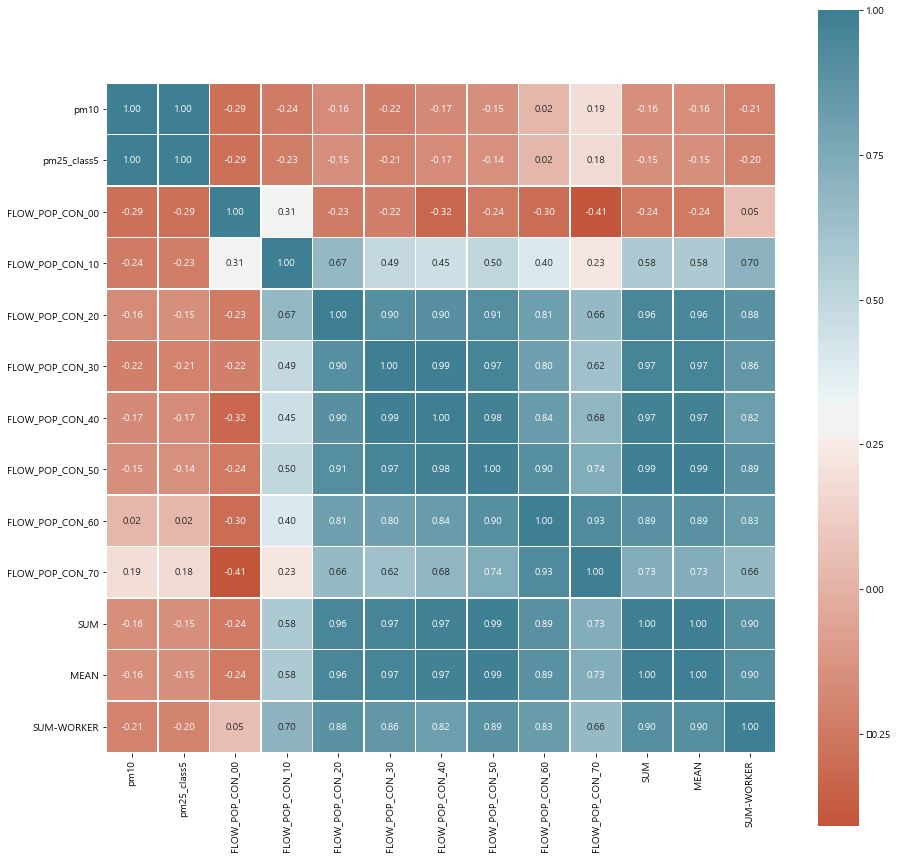

In [16]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,15))
sns.heatmap(data = flow_dust.corr(method = 'spearman'), annot=True, 
fmt = '.2f', linewidths=.5, cmap=sns.diverging_palette(20, 220, n=200),square=True)

#### 1. 전반적으로 미세먼지의 나이대별 유동인구의 상관도는 낮은 음의 상관관계를 보인다.
#### 2. 0~10대의 낮은 연령대는 미세먼지에 상대적으로 높은 음의 상관관계로 보인다.
#### 3. 70세 이상의 연령대는 미세하지만 양의 상관관계를 보이는 특이한 현상이 관측된다.

#### 전체로 돌린 것보다 더 낮다.